In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


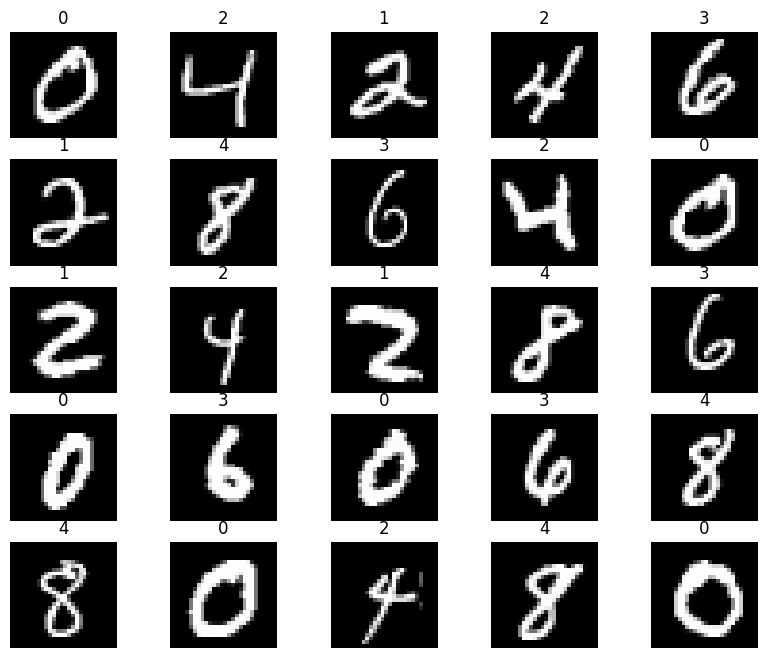

In [ ]:
even_digits = [0, 2, 4, 6, 8]
even_mask = np.isin(y_train, even_digits)
y_train = y_train[even_mask]
X_train = X_train[even_mask]

even_mask = np.isin(y_test, even_digits)

y_test = y_test[even_mask]
X_test = X_test[even_mask]

for i in range(len(y_train)):
  if y_train[i] == 0:
    y_train[i] = 0
  elif y_train[i] == 2:
    y_train[i] = 1
  elif y_train[i] == 4:
    y_train[i] = 2
  elif y_train[i] == 6:
    y_train[i] = 3
  elif y_train[i] == 8:
    y_train[i] = 4


for i in range(len(y_test)):
  if y_test[i] == 0:
    y_test[i] = 0
  elif y_test[i] == 2:
    y_test[i] = 1
  elif y_test[i] == 4:
    y_test[i] = 2
  elif y_test[i] == 6:
    y_test[i] = 3
  elif y_test[i] == 8:
    y_test[i] = 4

#print train dataset
plt.figure(figsize=(10, 8))
for i in range(0, 25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.title(y_train[i])
  plt.axis(False)
plt.show()
plt.close()




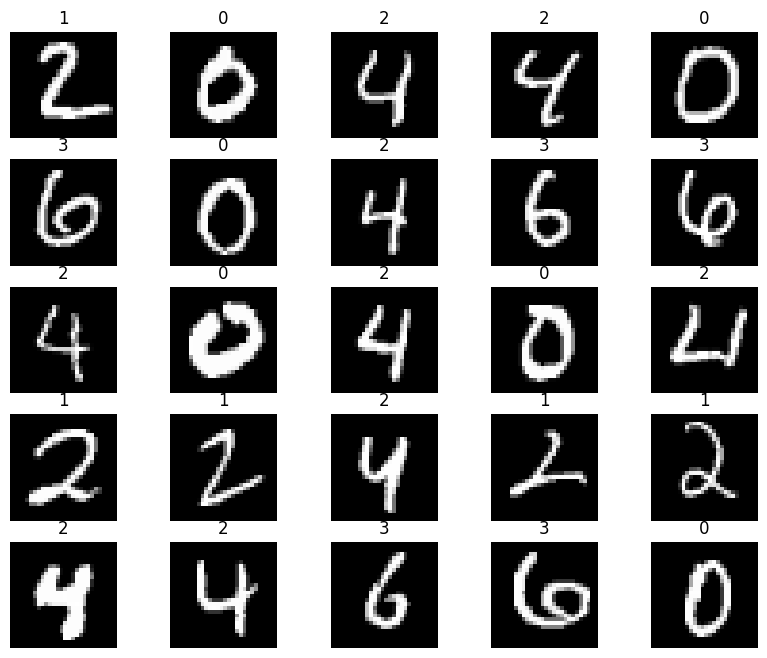

In [ ]:
#print test dataset
plt.figure(figsize=(10, 8))
for i in range(0, 25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(X_test[i], cmap = 'gray')
  plt.title(y_test[i])
  plt.axis(False)
plt.show()
plt.close()

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [ ]:
def build_model():
  inputs = Input(shape=(28, 28, 1), name = 'Input-layer')
  x = Conv2D(32, (3, 3), activation = 'relu', name = 'conv-1')(inputs)
  x = Conv2D(64, (3, 3), activation = 'relu', name = 'conv-2')(x)
  x = MaxPooling2D((2, 2), name = 'pooling-layer')(x)
  x = Flatten()(x)
  x = Dense(128, activation = 'relu', name = 'Dense-layer')(x)
  outputs = Dense(5, activation = 'softmax', name = 'output-layer')(x)
  model = Model(inputs, outputs, name = 'DNN')
  return model

In [ ]:
model = build_model()
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input-layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-1 (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-2 (Conv2D)                 │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense-layer (Dense)             │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,237 (4.57 MB)

 Trainable params: 1,199,237 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
validation_loss = float('inf')

inf


In [ ]:
for epoch in range(20):
  print(f'Epoch {epoch + 1} / 20')
  if epoch == 10:
    model.get_layer('conv-1').trainable = False
    model.get_layer('conv-2').trainable = False
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs = 1, validation_split= 0.2)
  current_validation_loss = history.history['val_loss'][0]
  if current_validation_loss < validation_loss:
    validation_loss = current_validation_loss
    model.save('best_model.h5')
    print(f'Model is saved and val_loss : {current_validation_loss}')
  else:
    print('Model is not improved')

Epoch 1 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 68s 89ms/step - accuracy: 0.9405 - loss: 0.1713 - val_accuracy: 0.9937 - val_loss: 0.0218


Model is saved and val_loss : 0.021753724664449692
Epoch 2 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9933 - loss: 0.0187 - val_accuracy: 0.9912 - val_loss: 0.0249
Model is not improved
Epoch 3 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 59s 81ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9905 - val_loss: 0.0306
Model is not improved
Epoch 4 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 60s 81ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9930 - val_loss: 0.0270
Model is not improved
Epoch 5 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9941 - val_loss: 0.0250
Model is not improved
Epoch 6 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 59s 81ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9873 - val_loss: 0.0545
Model is not improved
Epoch 7 / 20
738/738 ━━━━━━━━━━━━━━━━━━━━ 59s 80ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9897 - val_loss: 0.0470
Model is not improved
Epoch 8 / 20
738/738 ━━━━